### Proyecto Final - Mario Bolaños - Grace Murray Hopper

#### Importar librerias y clases customizadas

In [2]:
import sys
import pandas as pd
from importlib import reload 
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Leer Clases Customizadas - REORGANIZADAS ✅
# Ajustar rutas desde clases/main_pipelines/ hacia raíz del proyecto
sys.path.append('../../')
sys.path.append('../../clases')
sys.path.append('../../clases/data_preparation')
sys.path.append('../../clases/scoring')
sys.path.append('../../clases/ml_models/anomaly_detection')
sys.path.append('../../clases/ml_models/clustering')
sys.path.append('../../clases/exploratory_analysis')

import NosScore
reload(NosScore)
from NosScore import ScoreDynamic

import data_merge
reload(data_merge)

import PrepPipeline
reload(PrepPipeline)
from PrepPipeline import DataPreparationPipeline


# === ANALYTICS MODULE ===
print("\n📊 CARGANDO ANALYTICS...")
from clases.data_preparation.anualizacion import Anualizacion
from clases.data_preparation.quarteralization import Quarteralization

# === EXPLORATORY ANALYSIS ===
print("🔍 CARGANDO EXPLORATORY ANALYSIS...")
from clases.exploratory_analysis.Analisis_exploratorio import AnalisisExploratorio

# === ANOMALY DETECTION - ORCHESTRATOR VERSION ===
print("🤖 CARGANDO ANOMALY DETECTION ORCHESTRATOR...")
from clases.ml_models.anomaly_detection.anomaly_detection_orchestrator import AnomalyDetectionOrchestrator


📊 CARGANDO ANALYTICS...
🔍 CARGANDO EXPLORATORY ANALYSIS...
🤖 CARGANDO ANOMALY DETECTION ORCHESTRATOR...


#### Activar Base de datos y actualizar archivo

In [3]:
nos_path = "../../Datasets/Polaris_reports/*.xlsx"
cust_path = "../../Datasets/MDM_cust/MDM_CUST.csv"
prod_path = "../../Datasets/MDM_prod/mx_prod.xlsx"

In [4]:
pipeline = DataPreparationPipeline(nos_path, cust_path, prod_path)
final_df, missing_channel_team_stats, analyze_missing_product_data = pipeline.run()

Iniciando preparacion data Polaris NOS
Tipos de datos ajustados a string para IDs
Clientes Dummy removidos: 115
Registros restantes: 922241
Columna 'corp_cust_id' renombrada a 'cust_id'
Preparacion data Polaris NOS completada
Iniciando preparación de MDM de clientes
Preparación de MDM de clientes completada
Iniciando preparación de MDM de productos
Preparación de MDM de productos completada

Merge con clientes:
  - Con match: 922241 (100.00%)
  - Sin match: 0 (0.00%)
✅ Quality Check: No se detectaron errores en nombres

Merge con productos:
  - Con match: 922241 (100.00%)
  - Sin match: 0 (0.00%)
Análisis de valores faltantes de Channel y Team
Total registros: 922,241
Channel faltante: 1 (0.00%)
Team faltante: 6 (0.00%)
✅ Quality Check: No se detectaron errores en nombres

Registros con datos de producto faltantes: 0
Registros con category_smo faltante: 0
Columna category_smo agregada según mapeo
Proceso de merge y transformación completado


In [5]:
final_df_filtered = final_df[final_df['quarter'].isin(['2023-10-01', '2024-10-01', '2025-10-01'])]

final_df_filtered.to_csv("../../Final_Reports/final_df.csv", index=False)

C:\Users\bolanos.m.5\AppData\Local\Temp\ipykernel_31980\3008120530.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  final_df_filtered = final_df[final_df['quarter'].isin(['2023-10-01', '2024-10-01', '2025-10-01'])]


#### Analisis Quarterly

In [6]:
Quarteralizer = Quarteralization(final_df_filtered)

In [7]:
resumen_anual = Quarteralizer.calcular_resumen_trimestral(final_df_filtered)

resumen_team = Quarteralizer.resumen_trimestral_por_grupo(final_df_filtered, 'team')

resumen_channel = Quarteralizer.resumen_trimestral_por_grupo(final_df_filtered, 'channel')

resumen_category = Quarteralizer.resumen_trimestral_por_grupo(final_df_filtered, 'category_smo')

resumen_customer = Quarteralizer.resumen_trimestral_por_grupo(final_df_filtered, ['customer',  'channel', 'team'])

resumen_customer_category = Quarteralizer.resumen_trimestral_por_grupo(final_df_filtered, ['customer', 'category_smo', 'channel', 'team'])

c:\Users\bolanos.m.5\OneDrive - Procter and Gamble\Documents\Polaris_DS_Master\clases\main_pipelines\../..\clases\data_preparation\quarteralization.py:228: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  quarter_data['variation_rate_nos_su'] = (1 + quarter_data.groupby(group_cols)['nos_su'].pct_change()) * 100
c:\Users\bolanos.m.5\OneDrive - Procter and Gamble\Documents\Polaris_DS_Master\clases\main_pipelines\../..\clases\data_preparation\quarteralization.py:228: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  quarter_data['variation_rate_nos_su'] = (1 + quarter_data.groupby(group_

In [8]:
# Sleccionar columnas específicas para mostrar
cols_to_display = [ 'fiscal_year', 'team', 'rate_nos', 'rate_nsrd', 'rate_sd', 'nos_su', 'variation_rate_nos', 'variation_rate_volume']
resumen_team_filtered = resumen_team[cols_to_display]

In [ ]:
# exportar resumen mercado
resumen_anual.to_csv('../../Final_Reports/pipeline_results/resumen_nacional.csv', index=False)

resumen_team.to_csv('../../Final_Reports/pipeline_results/resumen_team.csv', index=False)

resumen_channel.to_csv('../../Final_Reports/pipeline_results/resumen_channel.csv', index=False)

resumen_category.to_csv('../../Final_Reports/pipeline_results/resumen_category.csv', index=False)

resumen_customer.to_csv('../../Final_Reports/pipeline_results/resumen_customer.csv', index=False)

resumen_customer_category.to_csv('../../Final_Reports/pipeline_results/resumen_customer_category.csv', index=False)

In [9]:
#### Filtrar solo el año 2025 (data de interés)
df_2025 = resumen_customer[resumen_customer['fiscal_year'] == 2025]

df_2024 = resumen_customer[resumen_customer['fiscal_year'] == 2024]

#### Calculo del NOS Score (Formula se encuentra en la clase customizada)

In [10]:
# Usar ScoreDynamic en lugar de Score
Score_nos = ScoreDynamic(resumen_anual, df_2025)

In [11]:
score_nos_category = ScoreDynamic(resumen_anual, resumen_category, dimension_cols=['category_smo'])
resultado_filtrado = score_nos_category.calcular_score()
print(f"   ✅ {len(resultado_filtrado)} categorías procesadas")


SCORE calculado exitosamente para 9 entidades (category_smo).
Rango de SCORE: 1.11 - 10.00
SCORE promedio: 5.56
   ✅ 9 categorías procesadas


In [12]:
# ANÁLISIS POR CANAL - MÉTODO SIMPLIFICADO ✨

score_nos_channel = ScoreDynamic(resumen_anual, resumen_channel, dimension_cols=['channel'])
resultado_filtrado_channel = score_nos_channel.calcular_score()


SCORE calculado exitosamente para 10 entidades (channel).
Rango de SCORE: 1.00 - 10.00
SCORE promedio: 5.50


In [13]:
# ANÁLISIS POR EQUIPO - MÉTODO SIMPLIFICADO ✨ 
score_nos_team = ScoreDynamic(resumen_anual, resumen_team, dimension_cols=['team'])
resultado_filtrado_team = score_nos_team.calcular_score()

SCORE calculado exitosamente para 4 entidades (team).
Rango de SCORE: 2.50 - 10.00
SCORE promedio: 6.25


In [15]:
# ANÁLISIS POR CLIENTE - MÉTODO SIMPLIFICADO ✨
score_nos_cust = ScoreDynamic(resumen_anual, df_2025, dimension_cols=['customer', 'channel', 'team'])
resultado_filtrado_cust = score_nos_cust.calcular_score()

SCORE calculado exitosamente para 159 entidades (customer × channel × team).
Rango de SCORE: 0.06 - 10.00
SCORE promedio: 5.03


## Calcular Anómalos con base en el algoritmo Isolation Forest

#### Se tomara como tabla de train el año 2024 y se eliminaran 

In [17]:
df_2024 = resumen_customer.loc[(resumen_customer['fiscal_year'] == 2024) & (resumen_customer['variation_rate_nos'].isnull()==False)]


#### Setear tabla de train y testing

In [18]:
# setear test and train df
test_df = df_2025
train_df = df_2024

In [19]:
# 🔄 RECARGAR MÓDULOS DE ANOMALY DETECTION - ORCHESTRATOR ACTUALIZADO
print("🔄 Recargando módulos de anomaly detection...")
import importlib
import sys

# Limpiar módulos del cache - INCLUIR UTILITIES
modules_to_reload = [
    'clases.ml_models.anomaly_detection.anomaly_detection_orchestrator',
    'clases.ml_models.anomaly_detection.anomaly_optimizer',
    'clases.ml_models.anomaly_detection.utilities',
    'clases.ml_models.anomaly_detection.utilities.anomaly_explainer',
    'clases.ml_models.anomaly_detection.utilities.anomaly_predictor',
    'clases.ml_models.anomaly_detection.utilities.anomaly_reporter',
    'clases.ml_models.anomaly_detection.utilities.data_scaler',
    'clases.ml_models.anomaly_detection.utilities.data_validator'
]

for mod in modules_to_reload:
    if mod in sys.modules:
        del sys.modules[mod]


# Reimportar - ORCHESTRATOR CON get_optimization_dataframe() MEJORADO
from clases.ml_models.anomaly_detection.anomaly_detection_orchestrator import AnomalyDetectionOrchestrator
print("✅ Módulos recargados - Orchestrator")

# 🎯 USAR ANOMALY DETECTION ORCHESTRATOR - VERSIÓN SIMPLIFICADA
columns_to_model_anomaly = ['rate_nsrd', 'rate_sd', 'nos_su', 'variation_rate_nos', 'variation_rate_volume']

# Crear orchestrador
orchestrator = AnomalyDetectionOrchestrator(
    train_df=train_df,
    test_df=test_df,
    features=columns_to_model_anomaly
)

# ⚡ UNA SOLA LLAMADA - Análisis completo SIN PRINTS AUTOMÁTICOS
results = orchestrator.one_call_complete_analysis(
    segment_columns=['channel', 'team'],
    id_columns=['customer', 'team', 'channel'],
    optimize_model=True,
    national_values= resumen_anual[resumen_anual['fiscal_year']== 2025],
    verbose=False  
)

🔄 Recargando módulos de anomaly detection...
✅ Módulos recargados - Orchestrator
🔍 Evaluando combinaciones de features: [2, 3, 4, 5]
   Features disponibles: ['rate_nsrd', 'rate_sd', 'nos_su', 'variation_rate_nos', 'variation_rate_volume']

🎯 Probando combinaciones de 2 features...

🎯 Probando combinaciones de 3 features...

🎯 Probando combinaciones de 4 features...

🎯 Probando combinaciones de 5 features...

🏆 MEJOR COMBINACIÓN ENCONTRADA:
   Features: ['rate_nsrd', 'rate_sd', 'nos_su', 'variation_rate_volume']
   Parámetros: {'contamination': np.float64(0.05), 'max_samples': 'auto', 'n_estimators': np.int64(100)}
   Mean Score: -0.1007
✅ Escalador ajustado con 171 registros válidos
🤖 Modelo IsolationForest entrenado:
   - Estimadores: 100
   - Contaminación: 0.05
   - Muestras de entrenamiento: 171


In [20]:
# 📊 ACCEDER A RESULTADOS DEL ORCHESTRATOR

# Predicciones con anomalías detectadas
predictions_df = results['main_analysis']['predictions']

# Métricas generales
metrics = results['main_analysis']['metrics']

# Explicaciones de anomalías
explanations = results['main_analysis']['explanations']


summary = results['anomaly_summary']
# Si optimización está activa, ver features seleccionadas
if 'optimization' in results:
    print("🎯 FEATURES SELECCIONADAS:")
    print(results['optimization']['best_features'])
    print(f"\n🏆 MEJORES PARÁMETROS:")
    print(results['optimization']['best_params'])
    print(f"\n📊 SCORE COMPUESTO: {results['optimization']['composite_score']:.4f}")


🎯 FEATURES SELECCIONADAS:
['rate_nsrd', 'rate_sd', 'nos_su', 'variation_rate_volume']

🏆 MEJORES PARÁMETROS:
{'contamination': np.float64(0.05), 'max_samples': 'auto', 'n_estimators': np.int64(100)}

📊 SCORE COMPUESTO: -0.1007


In [21]:
display(metrics)

{'total_records': 159,
 'anomalies_count': np.int64(19),
 'normal_count': np.int64(140),
 'anomaly_percentage': np.float64(11.949685534591195),
 'normal_percentage': np.float64(88.0503144654088),
 'score_min': np.float64(-0.18120356472464583),
 'score_max': np.float64(0.25658102185399245),
 'score_mean': np.float64(-0.10072824876822321),
 'score_median': np.float64(-0.13571795236413128),
 'score_std': np.float64(0.10043695471500176)}

In [22]:
# 📊 RESULTADOS DE OPTIMIZACIÓN - USANDO MÉTODO DEL ORCHESTRATOR

# Pasar los datos de optimización al orchestrator para procesamiento
optimization_df = orchestrator.get_optimization_dataframe(
    results_data=results.get('optimization'),
    top_n=5, 
)

optimization_df

,rank,mean_score,n_features,contamination,n_estimators,max_samples,features
21,1,-0.10,4,0.05,100,auto,"rate_nsrd, rate_sd, nos_su, variation_rate_volume"
25,2,-0.10,5,0.05,100,auto,"rate_nsrd, rate_sd, nos_su, variation_rate_nos..."
13,3,-0.11,3,0.05,100,170,"rate_nsrd, nos_su, variation_rate_nos"
12,4,-0.11,3,0.05,200,50,"rate_nsrd, rate_sd, variation_rate_volume"
14,5,-0.11,3,0.05,100,170,"rate_nsrd, nos_su, variation_rate_volume"


In [23]:
# 📋 EXPLICACIONES DE ANOMALÍAS - DISPLAY MANUAL (OPCIONAL)
# Solo ver las explicaciones sin el print automático de detalles

print(f"📊 Explicaciones disponibles: {len(explanations)} anomalías")
print(f"Columnas: {list(explanations.columns)}")


📊 Explicaciones disponibles: 19 anomalías
Columnas: ['customer', 'team', 'channel', 'anomaly_score', 'rate_nsrd', 'median_rate_nsrd', 'rate_nsrd_status', 'rate_sd', 'median_rate_sd', 'rate_sd_status', 'nos_su', 'median_nos_su', 'nos_su_status', 'variation_rate_volume', 'median_variation_rate_volume', 'variation_rate_volume_status', 'outlier_count', 'outlier_variables']


## Clusterizacion con  Clustering Jerarquico

In [24]:
# 📊 USAR PREDICTIONS_DF COMO TEST_DF_ENRICHED
# El orchestrator retorna las predicciones con anomalías en predictions_df
test_df_enriched = predictions_df.copy()


#### Ajustar y limpiar datos

In [25]:

# Ajustar y limpiar datos CON SCORE de ScoreDynamic
df_cluster = test_df_enriched[['customer', 'nos_su', 'rate_nsrd', 'rate_sd', 'variation_rate_nos', 'variation_rate_volume' ]].copy()
#df_cluster = test_df_enriched[['customer', 'rate_nsrd', 'rate_sd', 'nos_su' ]].copy()

# Traer el SCORE calculado con ScoreDynamic
score_data = resultado_filtrado_cust[['customer', 'SCORE']].copy()

# Merge para incorporar el SCORE real
df_cluster = df_cluster.merge(score_data, on='customer', how='left')

df_cluster.set_index('customer', inplace=True)
df_limpio = df_cluster.dropna(axis=0, how='any')

print(f"Dataset con SCORE de ScoreDynamic: {len(df_limpio)} clientes")
print(f"Columnas: {list(df_limpio.columns)}")


Dataset con SCORE de ScoreDynamic: 156 clientes
Columnas: ['nos_su', 'rate_nsrd', 'rate_sd', 'variation_rate_nos', 'variation_rate_volume', 'SCORE']


#### SFS + RFE + Grid Search

🔧 RECARGANDO MÓDULOS...
🔍 Ejecutando análisis completo con grid search y plots automáticos...


c:\Users\bolanos.m.5\polaris\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
4 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\bolanos.m.5\polaris\Lib\site-packages\sklearn\model_selection\_validation.py", line 857, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "c:\Users\bolanos.m.5\OneDrive - Procter and Gamble\Documents\Polaris_DS_Master\clases\main_pipelines\../..\clases\ml_models\clustering\estimator.py", line 45, in fit
    raise e
  File "c:\Users\bolanos.m.5\OneDrive - Procter and Gamble\Documents\Polaris_DS_Master\clases\main_pipelines\../..\clases\ml_mod

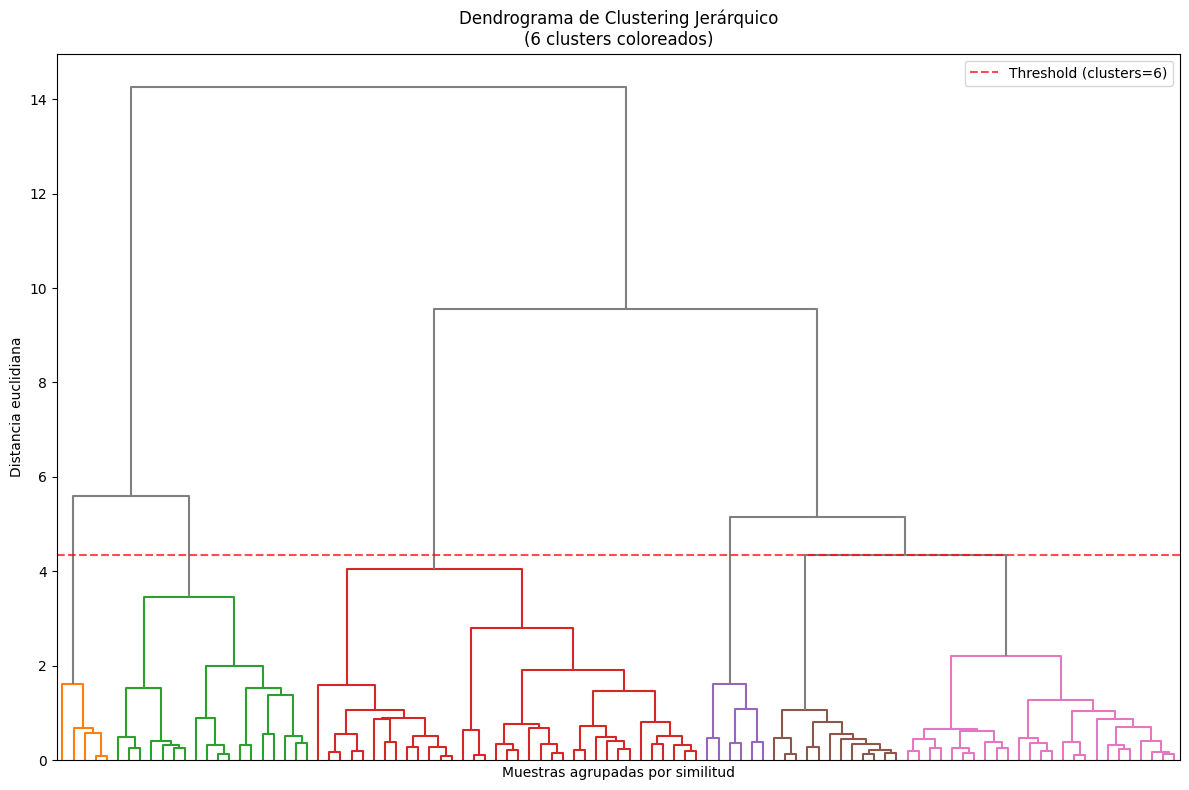

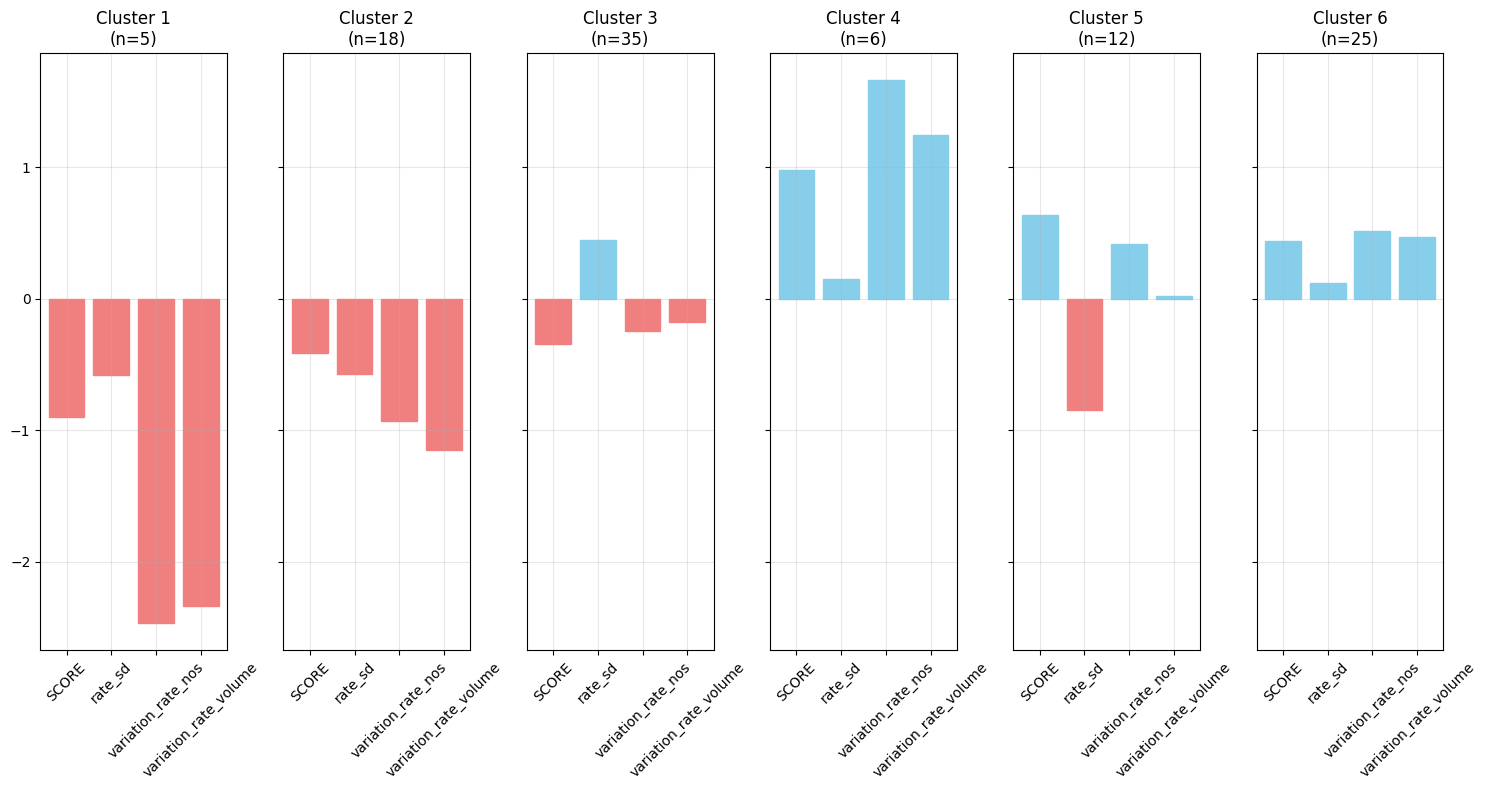

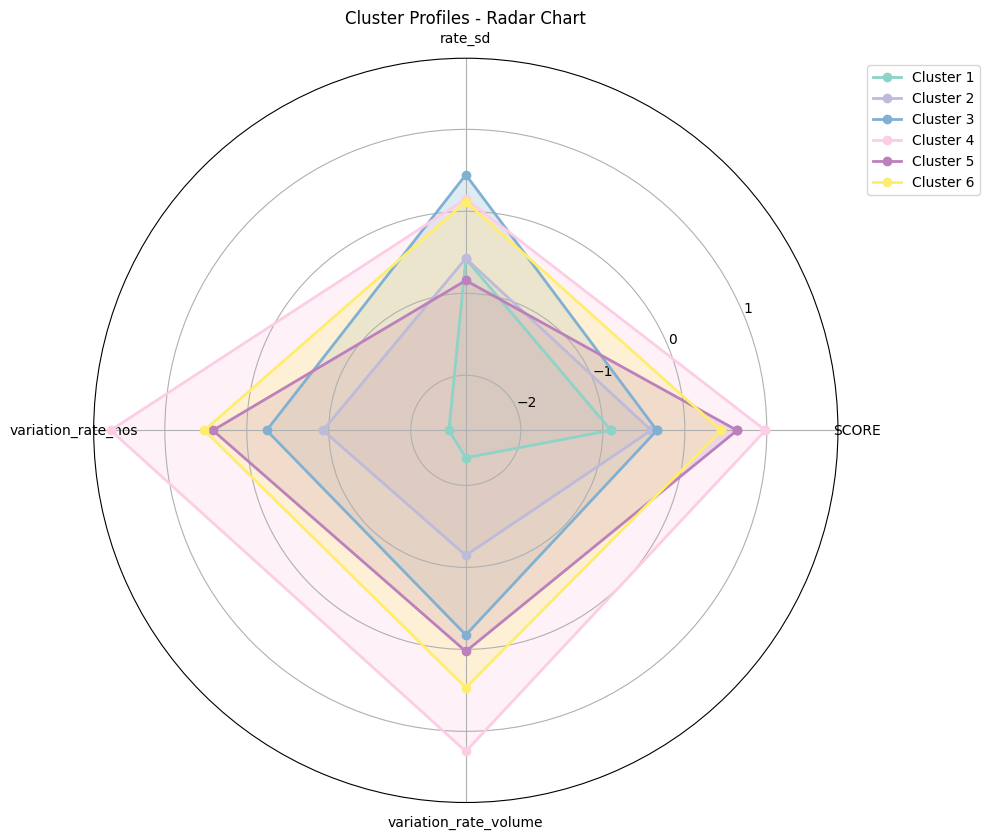

✅ Análisis completo terminado - Grid search, clustering y plots generados!


In [26]:
# 🚀 CLUSTERING SIMPLIFICADO CON GRID SEARCH AUTOMÁTICO
print("🔧 RECARGANDO MÓDULOS...")

# Recargar módulos
import importlib
import sys
modules_to_remove = [mod for mod in sys.modules.keys() if 'clustering' in mod]
for mod in modules_to_remove:
    if mod in sys.modules:
        del sys.modules[mod]

from clases.ml_models.clustering.analyzer import ClusteringAnalyzer

# 🎯 UNA SOLA LLAMADA - CLUSTERING COMPLETO CON PLOTS AUTOMÁTICOS
analyzer = ClusteringAnalyzer(
    data=df_limpio,                            
    min_clusters=5,               
    max_clusters=6,               
    filter_outliers=True,         
    outlier_threshold=1,          
    iqr_multiplier=1.5,           
    exclude_columns=['SCORE']     
)

print("🔍 Ejecutando análisis completo con grid search y plots automáticos...")

# 🔇 SUPRIMIR WARNINGS DE GRIDSEARCHCV TEMPORALMENTE
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', message='.*fits failed.*')
    warnings.filterwarnings('ignore', message='.*score on these train-test partitions.*')
    warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')
    
    results_completo = analyzer.full_analysis(
        min_clusters=5,                      
        max_clusters=6,                      
        select_features=True,                
        selection_method='sfs_rfe_grid',     
        min_features=4,                      
        required_features=['SCORE'],         
        plot_results=True,
        verbose=False
    )

print("✅ Análisis completo terminado - Grid search, clustering y plots generados!")

In [27]:
# 📊 ANALIZAR RESULTADOS COMPLETOS

# Usar el resultado del análisis completo que ya incluye grid search y clustering óptimo
analysis_summary = analyzer.analyze_grid_expanded_results(
    results=results_completo,
    display_top_n=15,
    verbose=False
)

print(f"\n🎯 INSIGHTS AUTOMATIZADOS DEL ANÁLISIS COMPLETO:")
insights = analysis_summary['insights']
print(f"   ✅ Algoritmo ganador: {insights['winner_algorithm']}")
print(f"   ✅ Features óptimas: {len(insights['best_features'])} seleccionadas")
print(f"   ✅ Total experimentos: {insights['total_experiments']}")

# Análisis de diversidad de métricas en top resultados
metric_analysis = analysis_summary['metric_analysis']
print(f"\n📈 DIVERSIDAD DE MÉTRICAS EN TOP 15 RESULTADOS:")
total_configs = sum(metric_analysis.values())
for metric, count in metric_analysis.items():
    pct = (count / total_configs) * 100
    print(f"   • {metric}: {count} apariciones ({pct:.1f}%)")

# Análisis de métodos de clustering
method_analysis = analysis_summary['method_analysis']
print(f"\n🔧 MÉTODOS DE CLUSTERING MÁS EXITOSOS:")
for method, count in method_analysis.items():
    pct = (count / total_configs) * 100
    print(f"   • {method}: {count} apariciones ({pct:.1f}%)")


🎯 INSIGHTS AUTOMATIZADOS DEL ANÁLISIS COMPLETO:
   ✅ Algoritmo ganador: RFE-ward-euclidean-C6
   ✅ Features óptimas: 4 seleccionadas
   ✅ Total experimentos: 24

📈 DIVERSIDAD DE MÉTRICAS EN TOP 15 RESULTADOS:
   • euclidean: 12 apariciones (80.0%)
   • cosine: 3 apariciones (20.0%)

🔧 MÉTODOS DE CLUSTERING MÁS EXITOSOS:
   • complete: 7 apariciones (46.7%)
   • ward: 4 apariciones (26.7%)
   • average: 4 apariciones (26.7%)


In [28]:
# Formatear silhouette_score a 4 decimales antes de mostrar
top_results_formatted = analysis_summary['top_results'].head(10).copy()
top_results_formatted['silhouette_score'] = top_results_formatted['silhouette_score'].map(lambda x: f"{x:.4f}")
top_results_formatted

,method_type,hyperparams_method,hyperparams_metric,hyperparams_n_clusters,selected_features,n_features,silhouette_score,algorithm,full_result
0,RFE,ward,euclidean,6,"[SCORE, rate_sd, variation_rate_nos, variation...",4,0.3440,RFE-ward-euclidean-C6,"{'selected_features': ['SCORE', 'rate_sd', 'va..."
1,RFE,ward,euclidean,5,"[SCORE, rate_sd, variation_rate_nos, variation...",4,0.3374,RFE-ward-euclidean-C5,"{'selected_features': ['SCORE', 'rate_sd', 'va..."
2,RFE,average,euclidean,6,"[SCORE, rate_sd, variation_rate_nos, variation...",4,0.3168,RFE-average-euclidean-C6,"{'selected_features': ['SCORE', 'rate_sd', 'va..."
3,RFE,complete,euclidean,6,"[SCORE, rate_sd, variation_rate_nos, variation...",4,0.2995,RFE-complete-euclidean-C6,"{'selected_features': ['SCORE', 'rate_sd', 'va..."
4,RFE,complete,euclidean,5,"[SCORE, rate_sd, variation_rate_nos, variation...",4,0.2572,RFE-complete-euclidean-C5,"{'selected_features': ['SCORE', 'rate_sd', 'va..."
5,RFE,complete,cosine,5,"[SCORE, rate_sd, variation_rate_nos, variation...",4,0.2412,RFE-complete-cosine-C5,"{'selected_features': ['SCORE', 'rate_sd', 'va..."
6,SFS,average,euclidean,6,"[SCORE, nos_su, rate_nsrd, rate_sd]",4,0.2411,SFS-average-euclidean-C6,"{'selected_features': ['SCORE', 'nos_su', 'rat..."
7,SFS,ward,euclidean,5,"[SCORE, nos_su, rate_nsrd, rate_sd]",4,0.2367,SFS-ward-euclidean-C5,"{'selected_features': ['SCORE', 'nos_su', 'rat..."
8,RFE,average,euclidean,5,"[SCORE, rate_sd, variation_rate_nos, variation...",4,0.2325,RFE-average-euclidean-C5,"{'selected_features': ['SCORE', 'rate_sd', 'va..."
9,SFS,ward,euclidean,6,"[SCORE, nos_su, rate_nsrd, rate_sd]",4,0.2217,SFS-ward-euclidean-C6,"{'selected_features': ['SCORE', 'nos_su', 'rat..."


In [29]:
# Expandir features en formato concatenado más legible
top_results_expanded = analysis_summary['top_results'].head(10).copy()

# Formatear silhouette_score a 4 decimales
top_results_expanded['silhouette_score'] = top_results_expanded['silhouette_score'].map(lambda x: f"{x:.4f}")

# Crear columna con features concatenadas de forma legible
top_results_expanded['features_selected'] = top_results_expanded['selected_features'].apply(
    lambda x: ' | '.join(x)
)

# Mostrar solo las columnas más importantes con features concatenadas
columns_to_show = ['method_type', 'hyperparams_method', 'hyperparams_metric', 
                   'hyperparams_n_clusters', 'n_features', 'silhouette_score', 'features_selected']

display_df = top_results_expanded[columns_to_show].copy()


#### Visualización Final de Clusters

In [30]:
# Usar la función del analyzer para calcular centroides
cluster_means_final = analyzer.get_cluster_centroids(
    features=None,  # Usa las features óptimas automáticamente
    include_counts=True,
    round_decimals=4
)

print("✅ CENTROIDES CALCULADOS CON ANALYZER:")
print(f"   • Clusters encontrados: {len(cluster_means_final)}")
print(f"   • Features analizadas: {len(cluster_means_final.columns) - 1}")

display(cluster_means_final)


✅ CENTROIDES CALCULADOS CON ANALYZER:
   • Clusters encontrados: 6
   • Features analizadas: 4


,n_customers,SCORE,rate_sd,variation_rate_nos,variation_rate_volume
cluster,,,,,
1,5,0.71,3.82,14.94,12.31
2,18,2.59,3.90,71.36,58.39
3,35,2.86,15.09,96.63,95.90
4,6,7.95,11.87,166.58,150.87
5,12,6.62,0.95,120.73,103.68
6,25,5.87,11.50,124.59,120.79


### Preparar Reporte final: Unir Score report + anomaly report + cluster report

In [31]:
# === PREPARAR REPORTE FINAL INTEGRADO - MERGE PASO A PASO ===
print("🔗 INICIANDO MERGE PASO A PASO...")

# 0. DATASET BASE: df_2025 Original
print(f"\n📊 DATASET BASE - df_2025 original:")
print(f"   • Registros: {len(df_2025)}")
print(f"   • Columnas: {list(df_2025.columns)[:5]}... (total: {len(df_2025.columns)})")

# 1. DATOS BASE: Información básica de clientes 2025 
base_data = df_2025[['customer', 'team', 'channel', 'nos', 'nos_su', 'rate_nos', 'rate_nsrd', 'rate_sd', 'variation_rate_nos', 'variation_rate_volume']].copy()
print(f"\n📋 PASO 1 - Base data seleccionada:")
print(f"   • Registros: {len(base_data)}")
print(f"   • Columnas: {list(base_data.columns)}")

# 2. AGREGAR SCORES: Traer SCORE calculado con ScoreDynamic
score_data = resultado_filtrado_cust[['customer', 'SCORE']].copy()
print(f"\n🏆 PASO 2 - Score data:")
print(f"   • Registros con SCORE: {len(score_data)}")
print(f"   • Columnas: {list(score_data.columns)}")

# Merge 1: Base + Scores
reporte_step1 = base_data.merge(score_data, on='customer', how='left')
print(f"\n✅ MERGE 1 - Base + Scores:")
print(f"   • Registros: {len(reporte_step1)}")
print(f"   • Missing SCORE: {reporte_step1['SCORE'].isnull().sum()}")

# 3. AGREGAR ANOMALÍAS: Extraer del orchestrator
anomaly_data = results['main_analysis']['predictions'][['customer', 'anomaly', 'anomaly_score']].copy()
print(f"\n⚠️ PASO 3 - Anomaly data:")
print(f"   • Registros: {len(anomaly_data)}")
print(f"   • Anomalías detectadas: {anomaly_data['anomaly'].sum()}")
print(f"   • Columnas: {list(anomaly_data.columns)}")

# Merge 2: Base+Scores + Anomalías  
reporte_step2 = reporte_step1.merge(anomaly_data, on='customer', how='left')
print(f"\n✅ MERGE 2 - Base + Scores + Anomalías:")
print(f"   • Registros: {len(reporte_step2)}")
print(f"   • Missing anomaly: {reporte_step2['anomaly'].isnull().sum()}")

# 4. AGREGAR CLUSTERS: Extraer del analyzer
# Obtener la data limpia con clusters del analyzer
clustering_data = analyzer.data_clean.copy()
clustering_data['cluster'] = analyzer.labels_
cluster_data = clustering_data.reset_index()[['customer', 'cluster']].copy()

print(f"\n🎯 PASO 4 - Cluster data:")
print(f"   • Registros: {len(cluster_data)}")
print(f"   • Clusters únicos: {cluster_data['cluster'].nunique()}")
print(f"   • Columnas: {list(cluster_data.columns)}")

# Merge 3: Base+Scores+Anomalías + Clusters
reporte_final = reporte_step2.merge(cluster_data, on='customer', how='left')

print(f"\n🎉 MERGE FINAL COMPLETADO:")
print(f"   • Registros totales: {len(reporte_final)}")
print(f"   • Columnas totales: {len(reporte_final.columns)}")
print(f"   • Missing values por columna:")
for col in ['SCORE', 'anomaly', 'cluster']:
    missing = reporte_final[col].isnull().sum()
    print(f"     - {col}: {missing} ({missing/len(reporte_final)*100:.1f}%)")

print(f"\n📋 COLUMNAS FINALES: {list(reporte_final.columns)}")

🔗 INICIANDO MERGE PASO A PASO...

📊 DATASET BASE - df_2025 original:
   • Registros: 159
   • Columnas: ['fiscal_year', 'quarter', 'customer', 'channel', 'team']... (total: 24)

📋 PASO 1 - Base data seleccionada:
   • Registros: 159
   • Columnas: ['customer', 'team', 'channel', 'nos', 'nos_su', 'rate_nos', 'rate_nsrd', 'rate_sd', 'variation_rate_nos', 'variation_rate_volume']

🏆 PASO 2 - Score data:
   • Registros con SCORE: 159
   • Columnas: ['customer', 'SCORE']

✅ MERGE 1 - Base + Scores:
   • Registros: 159
   • Missing SCORE: 3

⚠️ PASO 3 - Anomaly data:
   • Registros: 159
   • Anomalías detectadas: 19
   • Columnas: ['customer', 'anomaly', 'anomaly_score']

✅ MERGE 2 - Base + Scores + Anomalías:
   • Registros: 159
   • Missing anomaly: 0

🎯 PASO 4 - Cluster data:
   • Registros: 101
   • Clusters únicos: 6
   • Columnas: ['customer', 'cluster']

🎉 MERGE FINAL COMPLETADO:
   • Registros totales: 159
   • Columnas totales: 14
   • Missing values por columna:
     - SCORE: 3 (1.

In [33]:
# === VALIDAR CALIDAD DEL MERGE FINAL ===

print("🔍 VALIDACIÓN DEL MERGE FINAL:")
print("=" * 60)

# 1. Estadísticas generales
print(f"\n📊 ESTADÍSTICAS GENERALES:")
print(f"   • Total clientes: {len(reporte_final)}")
print(f"   • Clientes con SCORE: {(~reporte_final['SCORE'].isnull()).sum()}")
print(f"   • Clientes con detección anomalías: {(~reporte_final['anomaly'].isnull()).sum()}")
print(f"   • Clientes con cluster: {(~reporte_final['cluster'].isnull()).sum()}")

# 2. Distribución de anomalías
if 'anomaly' in reporte_final.columns:
    anomaly_count = reporte_final['anomaly'].sum()
    total_valid_anomaly = (~reporte_final['anomaly'].isnull()).sum()
    print(f"\n⚠️ DISTRIBUCIÓN DE ANOMALÍAS:")
    print(f"   • Total anomalías: {anomaly_count}")
    print(f"   • Total válidos: {total_valid_anomaly}")
    print(f"   • Tasa de anomalías: {anomaly_count/total_valid_anomaly*100:.2f}%")

# 3. Distribución de clusters
if 'cluster' in reporte_final.columns:
    print(f"\n🎯 DISTRIBUCIÓN DE CLUSTERS:")
    cluster_dist = reporte_final['cluster'].value_counts().sort_index()
    for cluster_id, count in cluster_dist.items():
        pct = count / len(reporte_final) * 100
        print(f"   • Cluster {cluster_id}: {count} clientes ({pct:.1f}%)")



print(f"\n✅ ¡MERGE COMPLETADO EXITOSAMENTE!")

🔍 VALIDACIÓN DEL MERGE FINAL:

📊 ESTADÍSTICAS GENERALES:
   • Total clientes: 159
   • Clientes con SCORE: 156
   • Clientes con detección anomalías: 159
   • Clientes con cluster: 101

⚠️ DISTRIBUCIÓN DE ANOMALÍAS:
   • Total anomalías: 19
   • Total válidos: 159
   • Tasa de anomalías: 11.95%

🎯 DISTRIBUCIÓN DE CLUSTERS:
   • Cluster 1.0: 5 clientes (3.1%)
   • Cluster 2.0: 18 clientes (11.3%)
   • Cluster 3.0: 35 clientes (22.0%)
   • Cluster 4.0: 6 clientes (3.8%)
   • Cluster 5.0: 12 clientes (7.5%)
   • Cluster 6.0: 25 clientes (15.7%)

✅ ¡MERGE COMPLETADO EXITOSAMENTE!


#### Exportar reporte en csv, para consumirlo en el Power BI

In [34]:
# === EXPORTAR REPORTES FINALES ===

# 1. Exportar reporte principal
#Obtener fecha de ejecucion
from datetime import datetime


# Obtener la fecha actual
fecha_actual = datetime.now()

# Formatear la fecha
fecha_formateada = fecha_actual.strftime('%d-%m-%Y')

reporte_final.to_csv(f'../../Final_Reports/pipeline_results/reporte_final_pipeline_{fecha_formateada}.csv', index=False)
reporte_final.to_excel(f'../../Final_Reports/pipeline_results/reporte_final_pipeline_{fecha_formateada}.xlsx', index=False)


print("✅ ARCHIVOS EXPORTADOS:")
print(f"   📊 reporte_final_pipeline_{fecha_formateada}.csv/.xlsx - Reporte integrado completo")
print(f"   📋 Registros: {len(reporte_final)} clientes")
print(f"   🎯 Clusters: {reporte_final['cluster'].nunique()} grupos")
print(f"   ⚠️ Anomalías: {reporte_final['anomaly'].sum()} casos")
print(f"   📁 Ubicación: ../../Final_Reports/pipeline_results/")

✅ ARCHIVOS EXPORTADOS:
   📊 reporte_final_pipeline_13-02-2026.csv/.xlsx - Reporte integrado completo
   📋 Registros: 159 clientes
   🎯 Clusters: 6 grupos
   ⚠️ Anomalías: 19 casos
   📁 Ubicación: ../../Final_Reports/pipeline_results/
